In [1]:
import math
import matplotlib.pyplot as plt

In [17]:
n = 2
M = 0.1

In [18]:
D = (n*M+n-1)**2-4*(n-1)*M
l1 = (n*M+n-1-math.sqrt(D))/(2*(n-1))
l2 = (n*M+n-1+math.sqrt(D))/(2*(n-1))

In [19]:
A01 = ((l2-1)/(l2-l1))
A02 = ((1-l1)/(l2-l1))
A11 = (l2)/(l2-l1)
A12 = (-l1)/(l2-l1)

In [20]:
times = range(0,20)
densities_0 = []
densities_1 = []
for t in times:
    f_T0 = A01*(l1*math.exp(-l1*t)) + A02*(l2*math.exp(-l2*t))
    densities_0.append(f_T0)
    f_T1 = A11*(l1*math.exp(-l1*t)) + A12*(l2*math.exp(-l2*t))
    densities_1.append(f_T1)

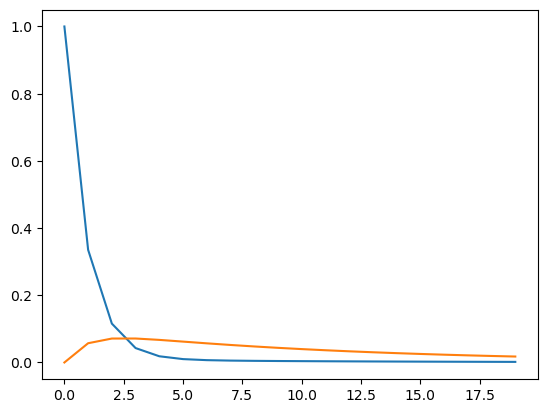

In [21]:
plt.plot(times, densities_0)
plt.plot(times, densities_1)
plt.show()

In [22]:
def prob_coal_time(t, deme0, deme1, M, n=2):
    """Calculates the probability of a coalescence time given the starting demes

    Equations from Wilkinson-Herbots (2008)

    Parameters
    ----------
    t : float
        time of coalescent event
    deme0 : int
        id of starting deme for lineage 0
    deme1 : int
        id of starting deme for lineage 1
    M : float
        migration rate
    n : int
        number of demes. (default: 2)

    Returns
    -------
    probability density for the time given the starting parameters
    
    """

    D = (n*M+n-1)**2-4*(n-1)*M
    l1 = (n*M+n-1-math.sqrt(D))/(2*(n-1))
    l2 = (n*M+n-1+math.sqrt(D))/(2*(n-1))
    f_X1 = l1*math.exp(-l1*t)
    f_X2 = l2*math.exp(-l2*t)
    if deme0 == deme1:
        A01 = (l2-1)/(l2-l1)
        A02 = (1-l1)/(l2-l1)
        return A01*f_X1 + A02*f_X2
    A11 = (l2)/(l2-l1)
    A12 = (-l1)/(l2-l1)
    return A11*f_X1 + A12*f_X2

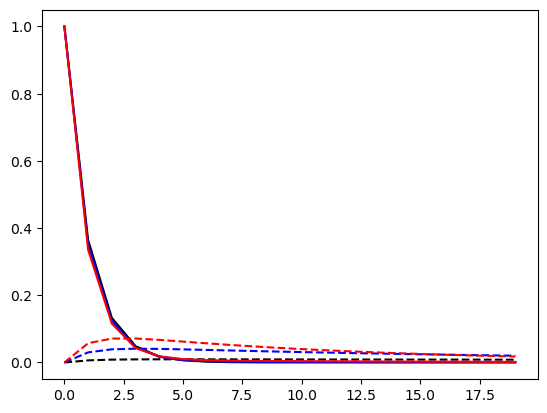

In [31]:
color = ["black", "blue", "red"]
times = range(0,20)
for c, m in enumerate([0.01, 0.05, 0.1]):
    for i in range(2):
        densities = []
        for t in times:
            densities.append(prob_coal_time(t, i, 0, m))
        if i == 0:
            plt.plot(times, densities, color=color[c])
        else:
            plt.plot(times, densities, linestyle="dashed", color=color[c])